In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
#from sklearn.metrics import accuracy_score

In [2]:
# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Converter os rótulos para o formato one-hot
y_one_hot = to_categorical(y, num_classes=3)

# Exibir para verificação
print("Features (X):", X[:5])
print("Rótulos originais (y):", y[:5])
print("Rótulos One-hot (y_one_hot):", y_one_hot[:5])


Features (X): [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Rótulos originais (y): [0 0 0 0 0]
Rótulos One-hot (y_one_hot): [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [3]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Criar o modelo de rede neural
net = Sequential()
# Adicionar a camada de entrada (e primeira camada oculta) com 256 neurônios
#net.add(Dense(25, input_shape=(3,), activation='relu'))
net.add(Dense(25, input_shape=(X_train.shape[1],), activation='relu'))
net.add(Dense(50, activation='relu'))
net.add(Dense(3, activation='softmax'))

2024-08-14 11:24:24.613239: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-08-14 11:24:24.613383: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-14 11:24:24.614765: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# Resumo do modelo
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                125       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compilar o modelo
net.compile(tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Treinar o modelo
history = net.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100


2024-08-14 11:24:24.740116: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-08-14 11:24:24.740452: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


4/4 [==============================] - 1s 251ms/step - loss: 0.6154 - accuracy: 0.7077 - val_loss: 0.4442 - val_accuracy: 0.9000
Epoch 2/100
4/4 [==============================] - 0s 45ms/step - loss: 0.4208 - accuracy: 0.7827 - val_loss: 0.2902 - val_accuracy: 0.8000
Epoch 3/100
4/4 [==============================] - 0s 46ms/step - loss: 0.3097 - accuracy: 0.7833 - val_loss: 0.2180 - val_accuracy: 0.9000
Epoch 4/100
4/4 [==============================] - 0s 46ms/step - loss: 0.2186 - accuracy: 0.8633 - val_loss: 0.1825 - val_accuracy: 0.9000
Epoch 5/100
4/4 [==============================] - 0s 49ms/step - loss: 0.2059 - accuracy: 0.8331 - val_loss: 0.1556 - val_accuracy: 0.9333
Epoch 6/100
4/4 [==============================] - 0s 61ms/step - loss: 0.1886 - accuracy: 0.9015 - val_loss: 0.1311 - val_accuracy: 0.9667
Epoch 7/100
4/4 [==============================] - 0s 46ms/step - loss: 0.1607 - accuracy: 0.9252 - val_loss: 0.1099 - val_accuracy: 0.9333
Epoch 8/100
4/4 [==============

In [8]:
# Avaliar o modelo
test_loss, test_acc = net.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

1/1 [==============================] - 0s 114ms/step - loss: 0.0093 - accuracy: 1.0000
Test accuracy: 1.0000


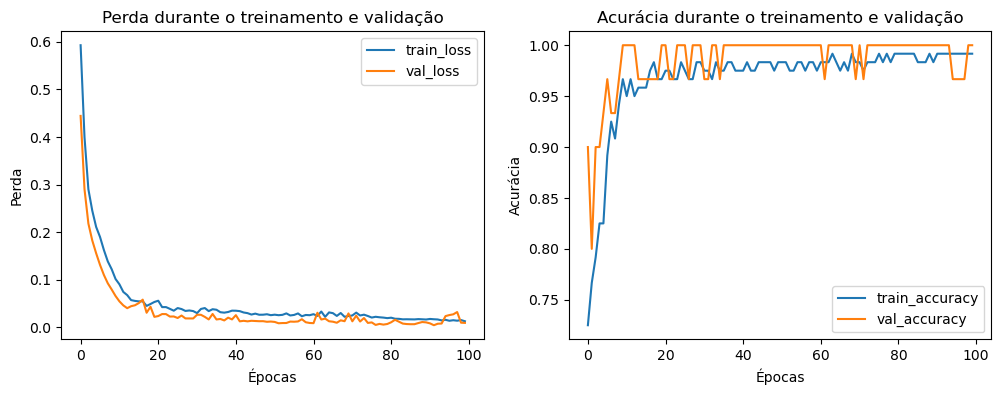

In [9]:
# Plotar as curvas de perda e acurácia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Acurácia durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()